In [ ]:
import os
import random
import dataProcess
import matplotlib.pyplot as plt
from PIL import Image
from torchvision.transforms import transforms as transforms
from tqdm import tqdm

# 定义变换
unlabeled_transfrom = transforms.Compose(
    [
        transforms.ToPILImage(),
        transforms.RandomResizedCrop((128, 128)),
        transforms.RandomRotation(10),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ColorJitter(brightness=0.5),
        transforms.RandomAffine(degrees=20, translate=(0.2, 0.2), scale=(0.7, 1.3)),
        transforms.ToTensor(),
    ]
)
stable_transfrom = transforms.Compose(
    [
        transforms.Resize([128, 128]),
        transforms.RandomHorizontalFlip(p=1),
        transforms.ToTensor(),
    ]
)
visualize_transform = transforms.Compose(
    [
        transforms.RandomResizedCrop((128, 128)),
        transforms.RandomRotation(10),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ColorJitter(brightness=0.5),
        transforms.RandomAffine(degrees=20, translate=(0.2, 0.2), scale=(0.7, 1.3)),
    ]
)

to_pil = transforms.ToPILImage()


def visualize_data_augmentation(
    dataset_path: str, num_images: int = 3, num_augmentations_per_image: int = 5
):
    """
    可视化深度学习项目中的数据增强效果。

    Args:
        dataset_path (str): 数据集根目录路径。
        num_images (int): 要可视化的原始图片数量。
        num_augmentations_per_image (int): 每张原始图片应用数据增强的次数。
    """
    train_dataset, _, _, _ = dataProcess.create_dataset(dataset_path)

    if not train_dataset:
        print("Error: No training dataset found or created.")
        return

    print("Visualizing data augmentation...")

    # 选择随机的几张图片进行可视化
    indices = random.sample(
        range(len(train_dataset)), min(num_images, len(train_dataset))
    )

    for i, idx in enumerate(tqdm(indices, desc="Processing images for visualization")):
        original_img, origin_label = train_dataset[
            idx
        ]  # 获取经过 transform 后的图片和标签

        try:
            original_image_path = train_dataset.samples[idx][0]
            original_pil_img = Image.open(original_image_path).convert("RGB")
        except AttributeError:
            print(
                "Warning: Could not get original image path from dataset. Displaying tensor as is."
            )
            original_pil_img = to_pil(original_img.cpu())  # 将 Tensor 转为 PIL Image

        fig, axes = plt.subplots(1, num_augmentations_per_image + 1, figsize=(15, 3))

        # 显示原始图片
        axes[0].imshow(original_pil_img)
        axes[0].set_title(f"Original {i + 1}")
        axes[0].axis("off")

        # 显示增强后的图片
        for j in range(num_augmentations_per_image):
            augmented_img_pil = visualize_transform(original_pil_img)
            axes[j + 1].imshow(augmented_img_pil)
            axes[j + 1].set_title(f"Augmented {j + 1}")
            axes[j + 1].axis("off")

        plt.tight_layout()
        plt.show()  # 在 ipynb 中直接显示图表，而不是保存到文件
        plt.close(fig)  # 关闭图形，避免内存泄漏

    print("\nData augmentation visualization completed.")


Finishing creating datasets!

Visualizing data augmentation...


Processing images for visualization:   0%|          | 0/3 [00:00<?, ?it/s]

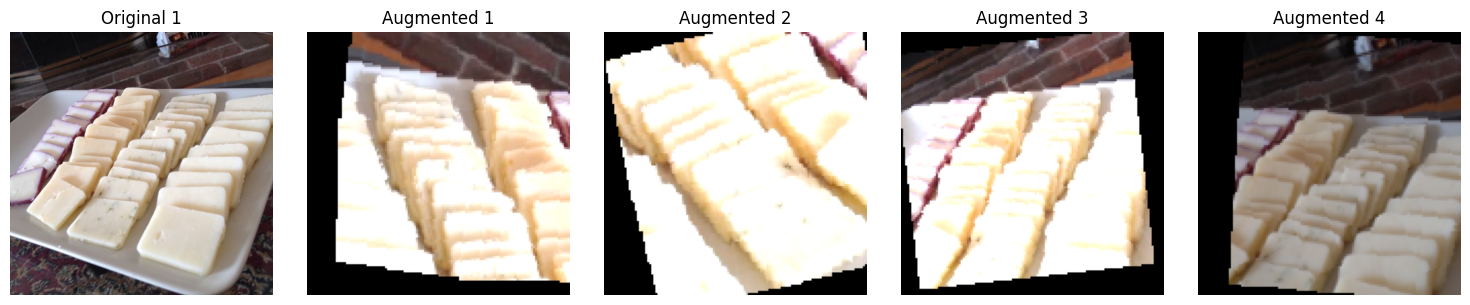

Processing images for visualization:  33%|███▎      | 1/3 [00:00<00:00,  4.92it/s]

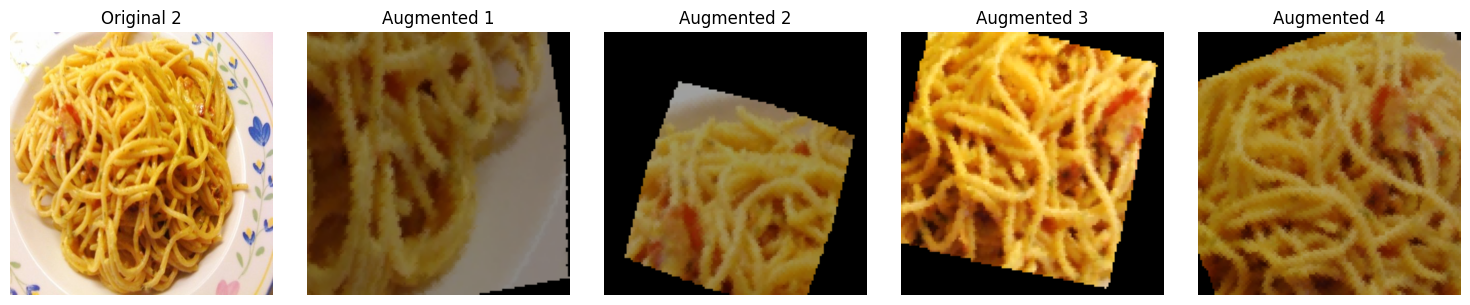

Processing images for visualization:  67%|██████▋   | 2/3 [00:00<00:00,  4.77it/s]

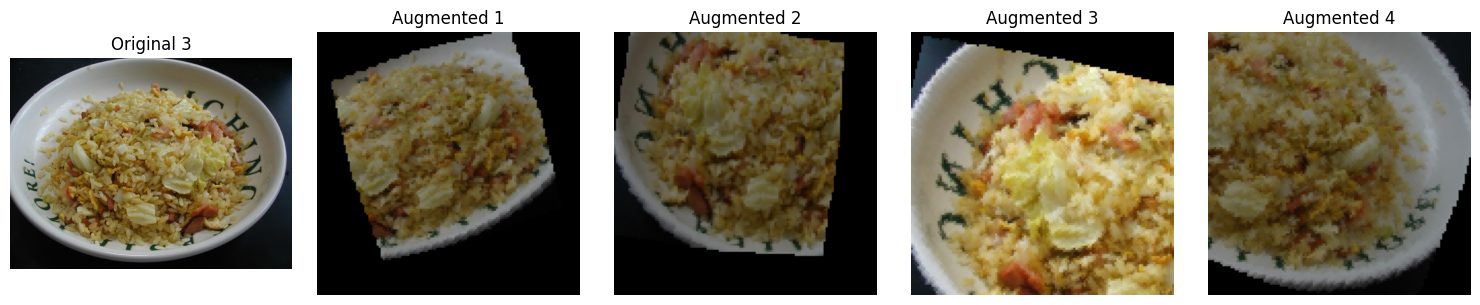

Processing images for visualization: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]


Data augmentation visualization completed.


In [21]:
if __name__ == "__main__":
    # 请根据你的实际项目路径修改这里
    data_root = "../../../resources/HW3/food-11/"  # 这是你的 main.py 中使用的路径

    # 运行可视化函数
    visualize_data_augmentation(data_root, num_images=3, num_augmentations_per_image=4)

In [20]:
# 获取当前工作目录
current_directory = os.getcwd()

# 打印当前工作目录
print("当前工作目录是:", current_directory)

当前工作目录是: /home/natsume/DeepL/DL2021/Homework/HW3/project3/src
